In [3]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import scipy.stats as sp
import seaborn as sns

In [4]:
%matplotlib inline
df = pd.read_csv("40403863_features.csv")
summary = np.zeros((16, 2, 5), dtype=float)

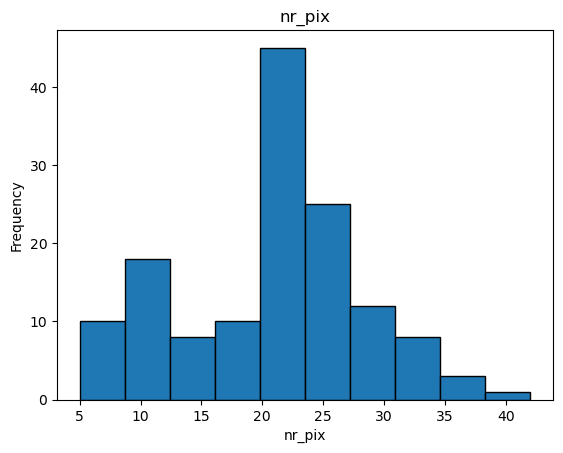

Skewness: -0.14169289555803818


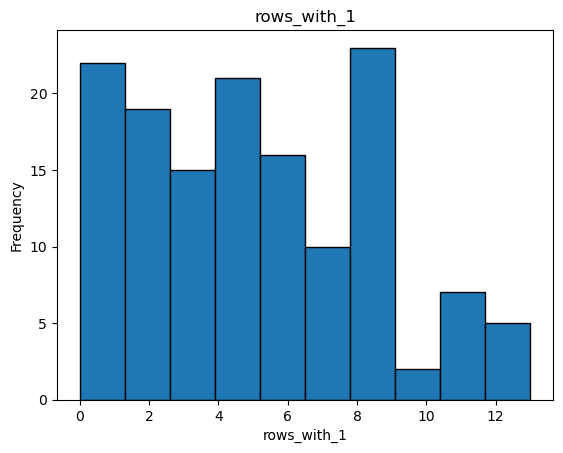

Skewness: 0.4043865693068703


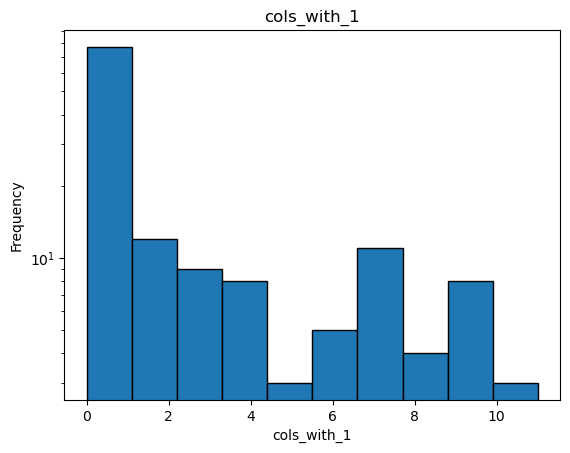

Skewness: 1.0205163782749351


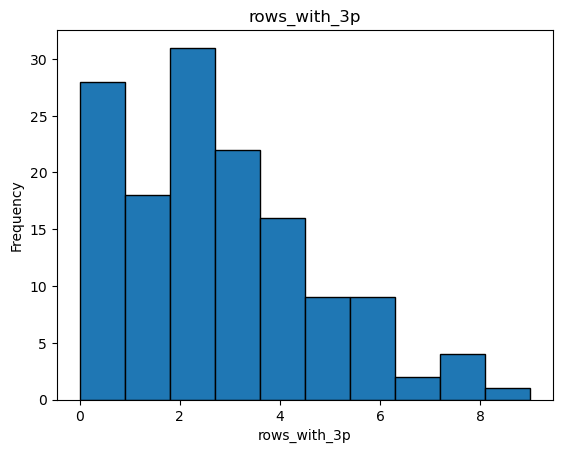

Skewness: 0.751745324457263


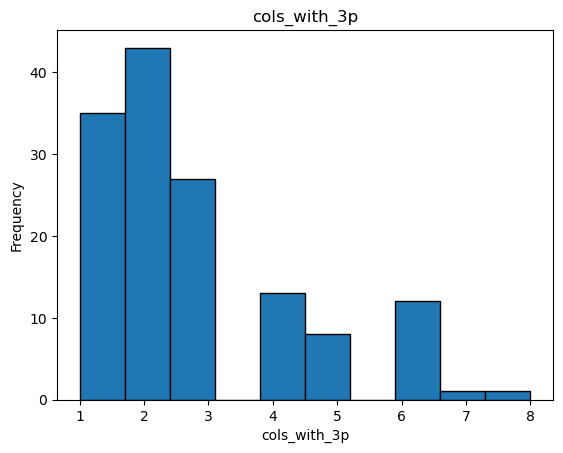

Skewness: 0.9728186785213437


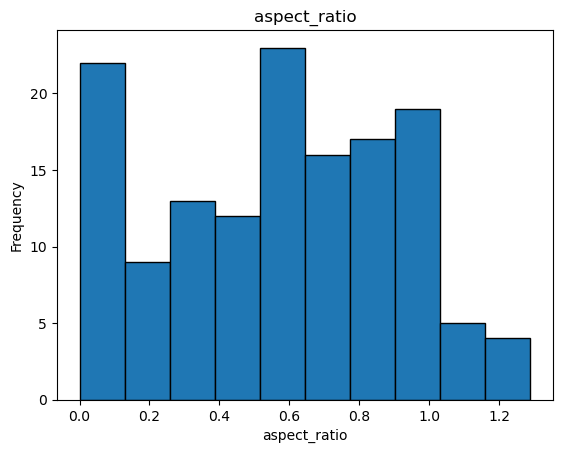

Skewness: -0.1095568610228991


In [5]:
#section 3.1
for x in range(2,8):
    skewness = sp.skew(df.iloc[:,x])
    if (skewness > 1 or skewness < -1):
        df.iloc[:,x].plot(kind="hist", edgecolor="black", logy = True)
        
    else:
        df.iloc[:, x].plot(kind="hist", edgecolor="black")
    plt.xlabel(df.iloc[:,x].name)
    plt.title(df.iloc[:,x].name)
    plt.show()
    print("Skewness:", skewness)
    plt.clf()

nr_pix
MEAN - Letters:  21.98 Non-Letters:  19.2
MEDIAN - Letters:  22.0 Non-Letters:  21.0
SD - Letters:  7.82 Non-Letters:  6.85
MAX - Letters:  42 Non-Letters:  34
MIN - Letters:  5 Non-Letters:  8
AVG DIF - Letters:  2.55


rows_with_1
MEAN - Letters:  5.26 Non-Letters:  4.8
MEDIAN - Letters:  6.0 Non-Letters:  3.0
SD - Letters:  2.99 Non-Letters:  3.72
MAX - Letters:  12 Non-Letters:  13
MIN - Letters:  0 Non-Letters:  0
AVG DIF - Letters:  1.04


cols_with_1
MEAN - Letters:  0.96 Non-Letters:  4.78
MEDIAN - Letters:  1.0 Non-Letters:  6.0
SD - Letters:  1.2 Non-Letters:  3.54
MAX - Letters:  4 Non-Letters:  11
MIN - Letters:  0 Non-Letters:  0
AVG DIF - Letters:  3.63


rows_with_3p
MEAN - Letters:  3.42 Non-Letters:  1.5
MEDIAN - Letters:  3.0 Non-Letters:  2.0
SD - Letters:  2.24 Non-Letters:  1.36
MAX - Letters:  9 Non-Letters:  6
MIN - Letters:  0 Non-Letters:  0
AVG DIF - Letters:  1.36


cols_with_3p
MEAN - Letters:  3.19 Non-Letters:  2.1
MEDIAN - Letters:  3.0 Non-Letters

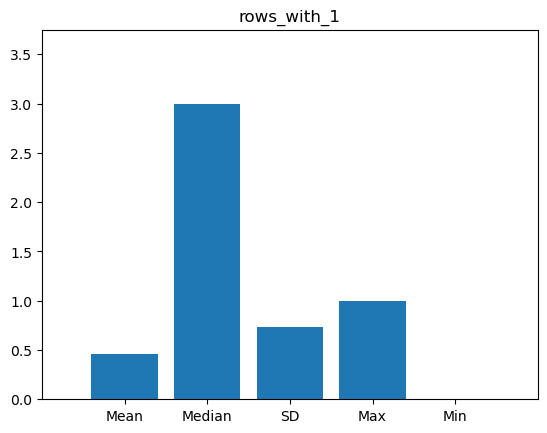

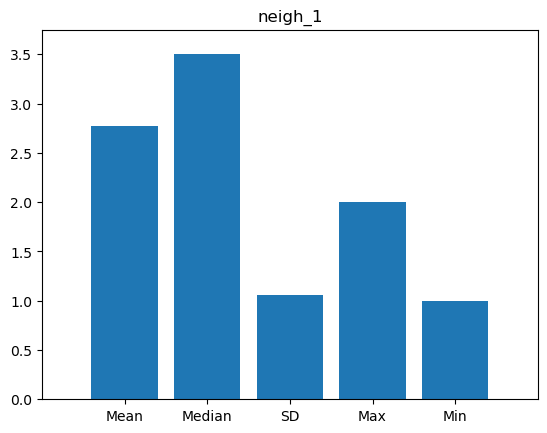

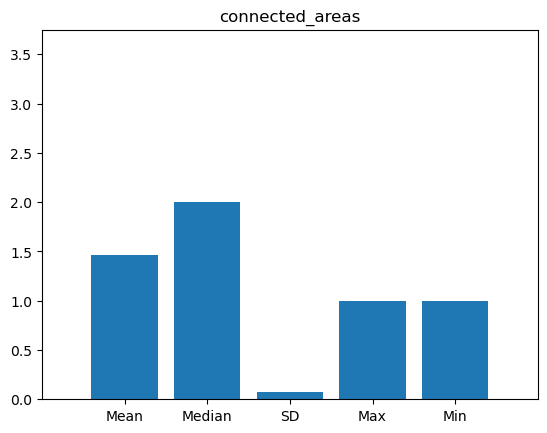

In [6]:
#section 3.2
#struggled to figure out how to split into letters and non letters, found the head() and tail() methods in the practicals
for x in range (2, 18):
    column = df.columns[x]
    letters = df[column].head(80)
    non_letters = df[column].tail(60)
    
    summary[x-2, 0, 0], summary[x-2, 1, 0] = letters.mean(), non_letters.mean()
    summary[x-2, 0, 1], summary[x-2, 1, 1] = letters.median(), non_letters.median()
    summary[x-2, 0, 2], summary[x-2, 1, 2] = letters.std(), non_letters.std()
    summary[x-2, 0, 3], summary[x-2, 1, 3] = letters.max(), non_letters.max()
    summary[x-2, 0, 4], summary[x-2, 1, 4] = letters.min(), non_letters.min()
            
    print(column)
    print("MEAN -", "Letters: ", round(summary[x-2, 0, 0], 2), "Non-Letters: ", round(summary[x-2, 1, 0],2))
    print("MEDIAN -", "Letters: ", summary[x-2, 0, 1], "Non-Letters: ", summary[x-2, 1, 1])
    print("SD -", "Letters: ", round(summary[x-2, 0, 2],2), "Non-Letters: ", round(summary[x-2, 1, 2],2))
    print("MAX -", "Letters: ", round(summary[x-2, 0, 3]), "Non-Letters: ", round(summary[x-2, 1, 3]))
    print("MIN -", "Letters: ", round(summary[x-2, 0, 4]), "Non-Letters: ", round(summary[x-2, 1, 4]))
    dif = 0
    for i in range(0,4):
        dif += abs(summary[x-2,0,i] - summary[x-2,1,i])
    print("AVG DIF -", "Letters: ", round(dif/5, 2))
    
    print("\n")
for x in [3,8,15]:
    plt.bar(["Mean", "Median", "SD", "Max", "Min"], abs(summary[x-2, 0] - summary[x-2, 1]))
    plt.axis([-1, 5, 0, 3.75])
    plt.title(df.columns[x])
    plt.savefig(df.columns[x] + ".png")
    plt.show()
    print("\n")

Two-sided t-test: t-stat=2.189026042995857, p-value=0.030276385747684816


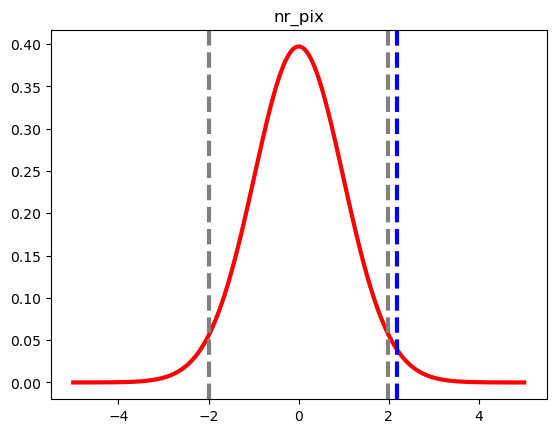

Two-sided t-test: t-stat=0.8157006012482081, p-value=0.4160770679844549


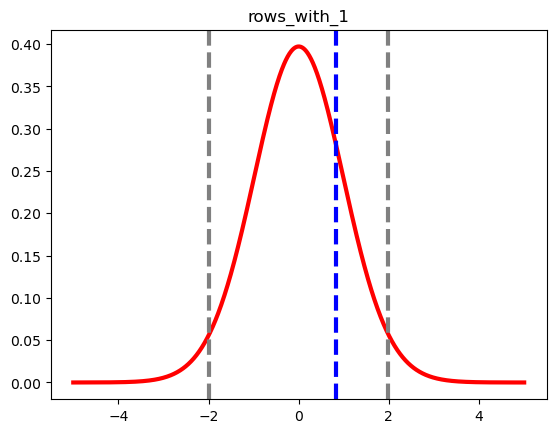

Two-sided t-test: t-stat=-8.998325338202639, p-value=1.6115525993844783e-15


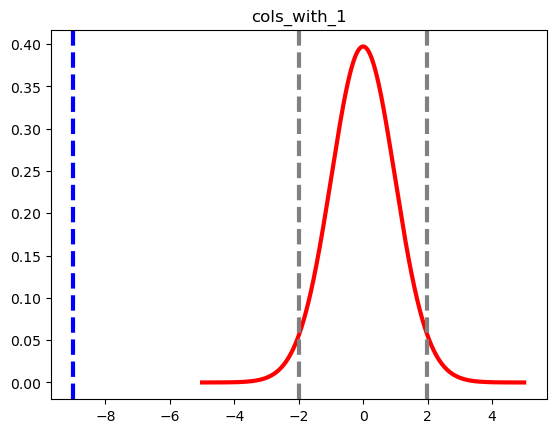

Two-sided t-test: t-stat=5.883228522687424, p-value=2.898849344161974e-08


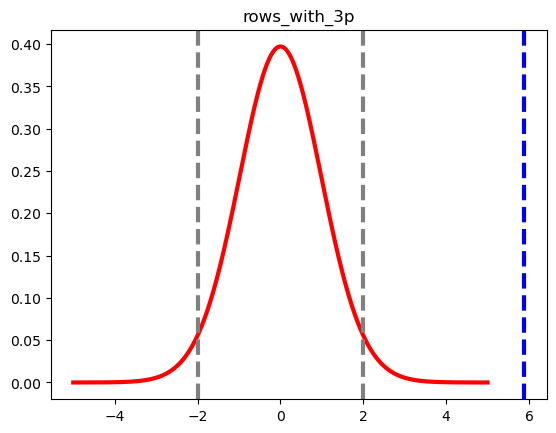

Two-sided t-test: t-stat=4.1456396383974115, p-value=5.884561296463006e-05


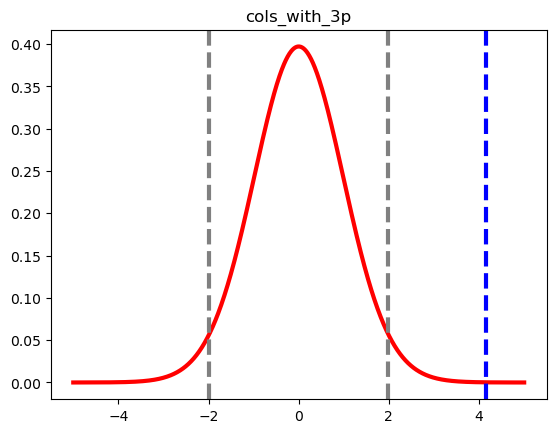

Two-sided t-test: t-stat=-0.8962865634249427, p-value=0.37166055985133417


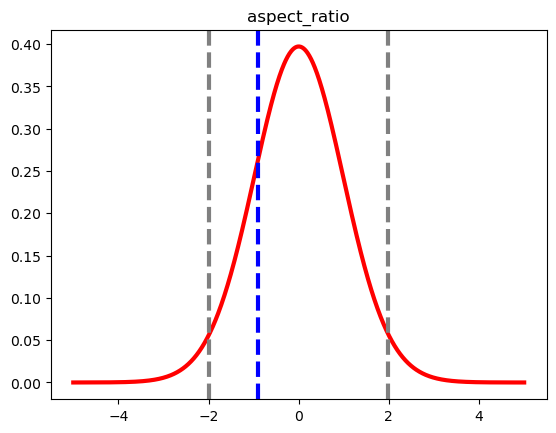

Two-sided t-test: t-stat=-11.793540702593454, p-value=1.2272401603608819e-22


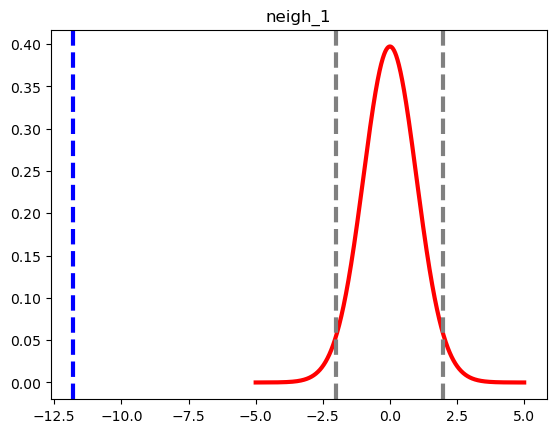

Two-sided t-test: t-stat=-1.93630123207378, p-value=0.054874784059182447


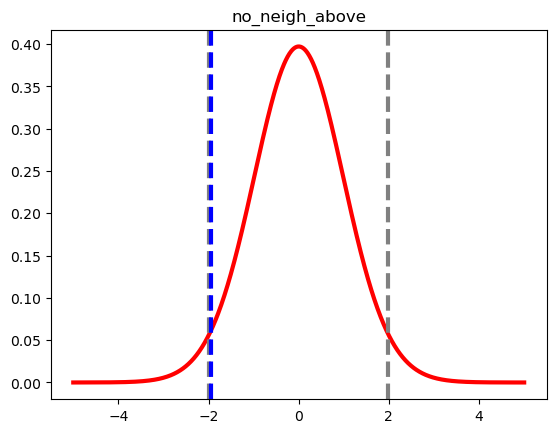

Two-sided t-test: t-stat=-1.733277512090116, p-value=0.08528001114152808


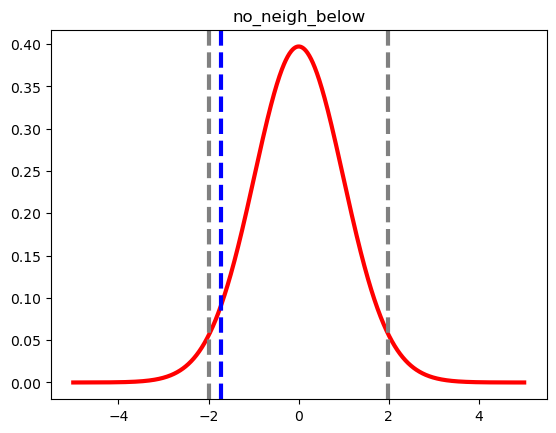

Two-sided t-test: t-stat=-3.184497213158205, p-value=0.0017927053066708989


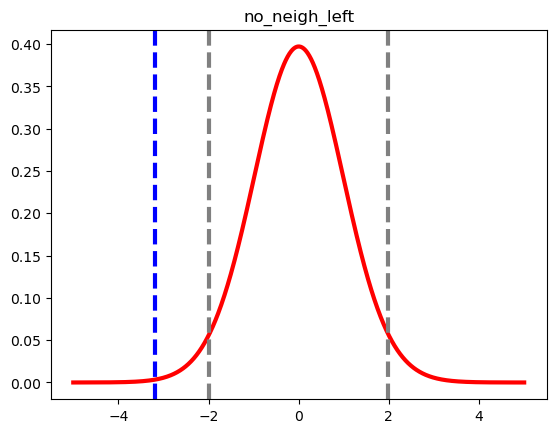

Two-sided t-test: t-stat=-4.036695464763359, p-value=8.944949528964616e-05


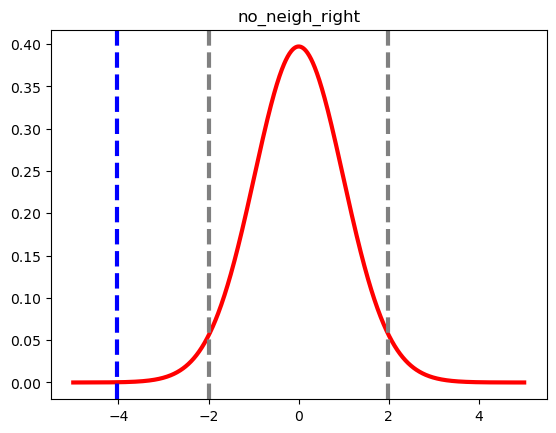

Two-sided t-test: t-stat=-1.6691949453006394, p-value=0.09734581208930819


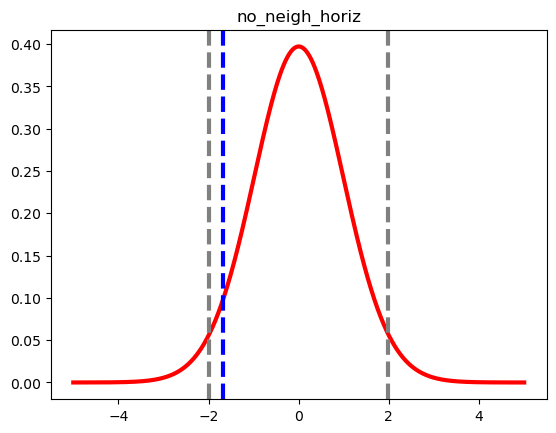

Two-sided t-test: t-stat=0.719409232191103, p-value=0.47310534326722153


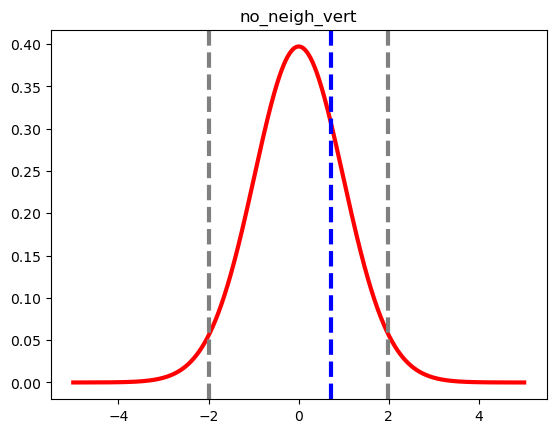

Two-sided t-test: t-stat=-19.734683325240407, p-value=5.2082706424491184e-42


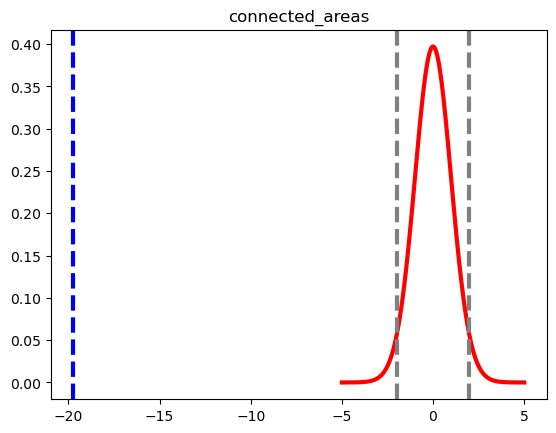

Two-sided t-test: t-stat=7.690439333539869, p-value=2.497208918995869e-12


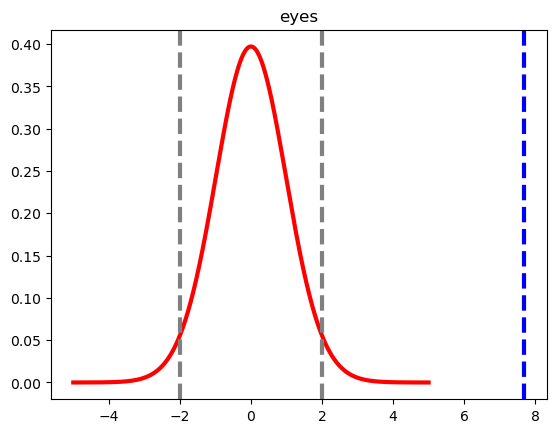

Two-sided t-test: t-stat=1.7715747483379827, p-value=0.07867233648882725


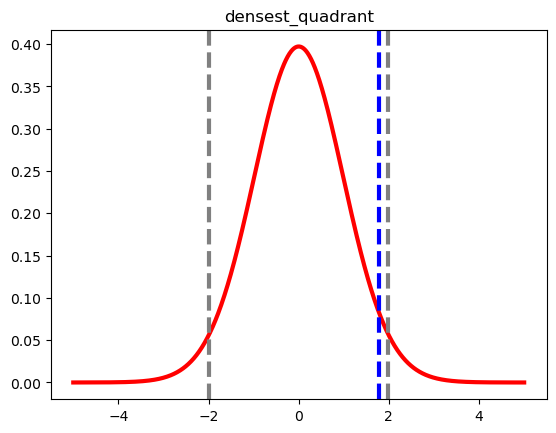

In [7]:
#section 3.3
from scipy.stats import ttest_ind
import math
np.random.seed(42)
x = np.linspace(-5, 5, 1000)
hx = sp.t.pdf(x, df=59)

for y in range(0, 16):
    head = df.iloc[:, y + 2].head(80)
    tail = df.iloc[:, y + 2].tail(60)
    t_stat, p_value = ttest_ind(head, tail)
    print(f"Two-sided t-test: t-stat={t_stat}, p-value={p_value}")

    ltail1 = sp.t.ppf(0.025, 79)
    rtail2 = sp.t.ppf(0.975, 79)

    plt.plot(x, hx, color="red", lw=3)
    plt.title(df.columns[y + 2])
    plt.axvline(x=ltail1, color="grey", linestyle="--", lw=3)
    plt.axvline(x=rtail2, color="grey", linestyle="--", lw=3)
    plt.axvline(x=t_stat, color="blue", linestyle="--", lw=3)
    plt.show()
    plt.clf()

High: nr_pix, rows_with_1 - -0.6041668996885743
Low: nr_pix, cols_with_1 - 0.17068276712828268
Very Strong: nr_pix, rows_with_3p - 0.8397951081515974


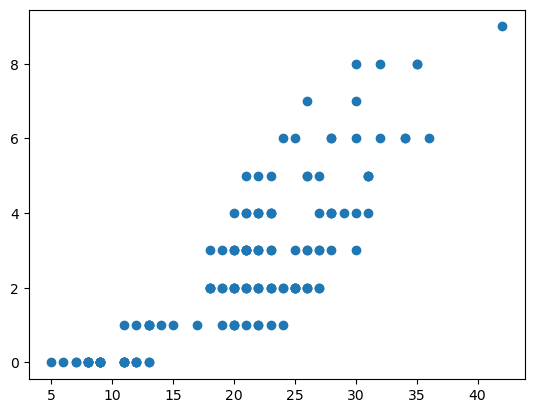

Very Strong: nr_pix, cols_with_3p - 0.7091796236172382


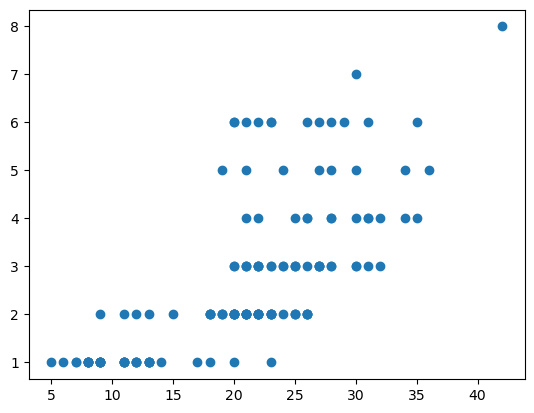

High: nr_pix, aspect_ratio - 0.6356572238196356
None: nr_pix, neigh_1 - -0.0039385675483614435
High: nr_pix, no_neigh_above - 0.5343842958020484
High: nr_pix, no_neigh_below - 0.5488705937656754
Medium: nr_pix, no_neigh_left - 0.49296806664847403
High: nr_pix, no_neigh_right - 0.5058217868021657
High: nr_pix, no_neigh_horiz - 0.6522777945603587
High: nr_pix, no_neigh_vert - 0.6580041079547858
Low: nr_pix, connected_areas - -0.18064898905705867
High: nr_pix, eyes - 0.5749022459317671
None: nr_pix, densest_quadrant - 0.04741542130381173
Medium: rows_with_1, cols_with_1 - -0.4257635224297012
High: rows_with_1, rows_with_3p - -0.5135776247027922
High: rows_with_1, cols_with_3p - -0.5661134639454665
Very Strong: rows_with_1, aspect_ratio - -0.7527173740401853


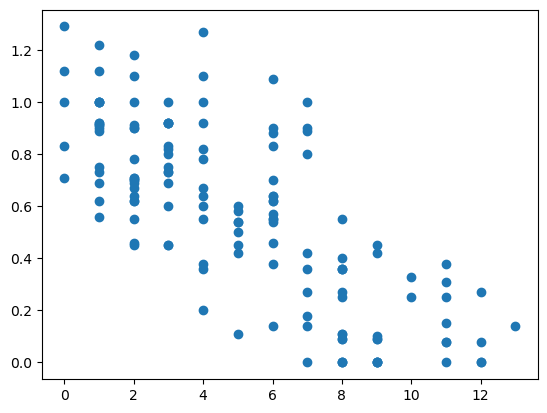

Low: rows_with_1, neigh_1 - -0.259363772793307
High: rows_with_1, no_neigh_above - -0.5029463623207779
High: rows_with_1, no_neigh_below - -0.5412491191803985
Low: rows_with_1, no_neigh_left - -0.11256368015114519
Low: rows_with_1, no_neigh_right - -0.19669215108580757
Medium: rows_with_1, no_neigh_horiz - -0.38412569027761045
High: rows_with_1, no_neigh_vert - -0.5995686880593176
Low: rows_with_1, connected_areas - -0.2084759320771581
Medium: rows_with_1, eyes - -0.39513205361629006
None: rows_with_1, densest_quadrant - 0.02574645296503493
Low: cols_with_1, rows_with_3p - -0.118131186188682
Low: cols_with_1, cols_with_3p - -0.18267316308742867
High: cols_with_1, aspect_ratio - 0.6160811189601014
Very Strong: cols_with_1, neigh_1 - 0.856722875780371


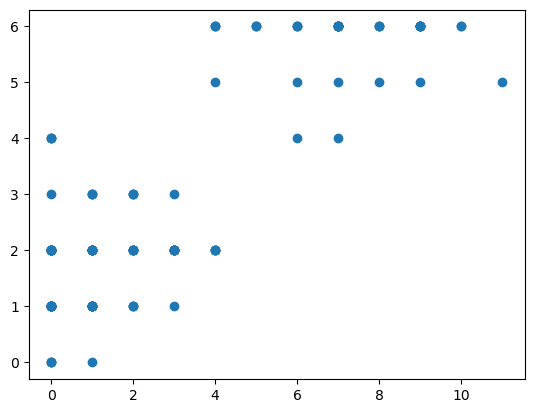

High: cols_with_1, no_neigh_above - 0.5623768015768018
High: cols_with_1, no_neigh_below - 0.5636139895056784
Medium: cols_with_1, no_neigh_left - 0.3056403526593898
Medium: cols_with_1, no_neigh_right - 0.36694125634994745
Medium: cols_with_1, no_neigh_horiz - 0.3840647201113357
Medium: cols_with_1, no_neigh_vert - 0.39616575494931305
Very Strong: cols_with_1, connected_areas - 0.795207569899816


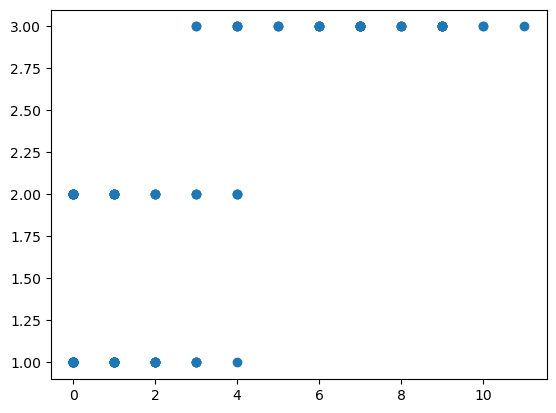

Medium: cols_with_1, eyes - -0.4373078774376592
Low: cols_with_1, densest_quadrant - -0.23811866371122414
Very Strong: rows_with_3p, cols_with_3p - 0.7046658206480048


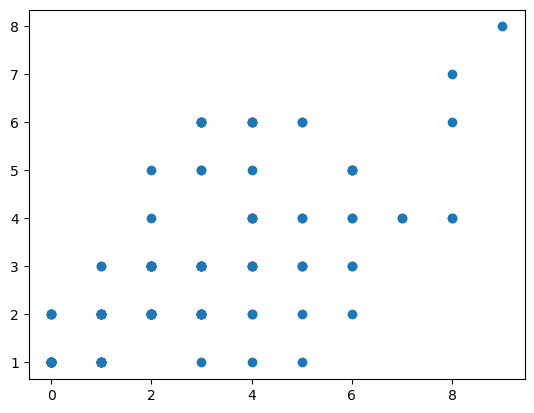

High: rows_with_3p, aspect_ratio - 0.5088783482377758
Medium: rows_with_3p, neigh_1 - -0.3282329728740483
Low: rows_with_3p, no_neigh_above - 0.25376954581219396
Low: rows_with_3p, no_neigh_below - 0.2988021294782651
Low: rows_with_3p, no_neigh_left - 0.266173491274983
Low: rows_with_3p, no_neigh_right - 0.26111808627253696
Medium: rows_with_3p, no_neigh_horiz - 0.4279541532057036
Medium: rows_with_3p, no_neigh_vert - 0.44925584073647723
Medium: rows_with_3p, connected_areas - -0.459513801534018
High: rows_with_3p, eyes - 0.6614795838867514
None: rows_with_3p, densest_quadrant - 0.09442986293201297
Medium: cols_with_3p, aspect_ratio - 0.35200231630852546
Medium: cols_with_3p, neigh_1 - -0.3190470864990454
Low: cols_with_3p, no_neigh_above - 0.28989718721976826
Medium: cols_with_3p, no_neigh_below - 0.3052823058744669
None: cols_with_3p, no_neigh_left - 0.029156738993025552
Low: cols_with_3p, no_neigh_right - 0.10342977139190708
Low: cols_with_3p, no_neigh_horiz - 0.28357876651619074
Me

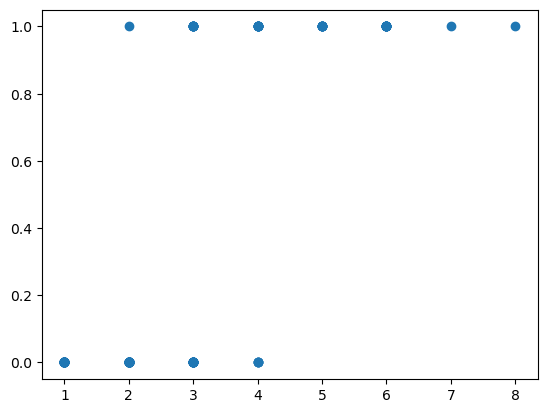

Low: cols_with_3p, densest_quadrant - 0.12460151960073826
Medium: aspect_ratio, neigh_1 - 0.3934592132389249
Very Strong: aspect_ratio, no_neigh_above - 0.7686097855377401


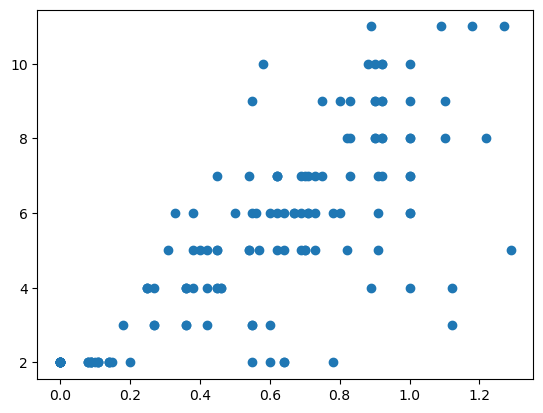

Very Strong: aspect_ratio, no_neigh_below - 0.8036714500982043


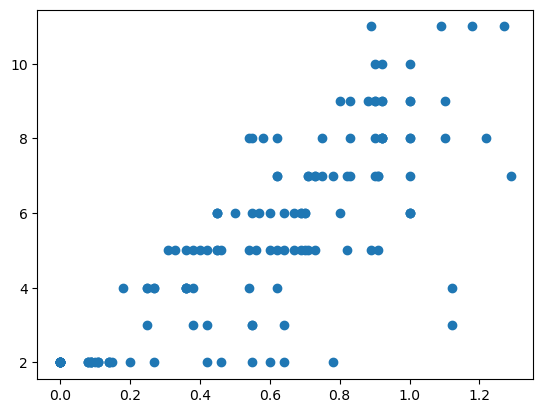

Low: aspect_ratio, no_neigh_left - 0.1034173506281377
Low: aspect_ratio, no_neigh_right - 0.13185905654964875
Medium: aspect_ratio, no_neigh_horiz - 0.4281548417858212
Very Strong: aspect_ratio, no_neigh_vert - 0.8138600784691965


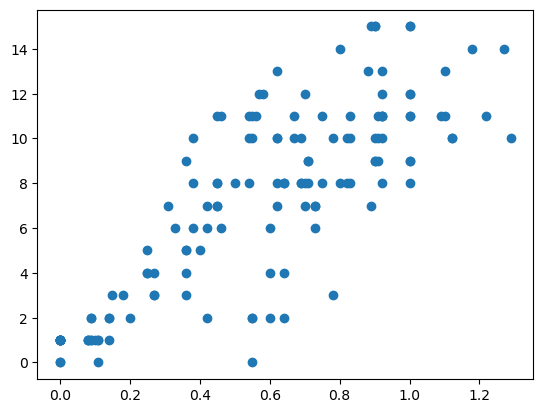

Low: aspect_ratio, connected_areas - 0.19192896874990295
Low: aspect_ratio, eyes - 0.16341489990740454
Low: aspect_ratio, densest_quadrant - -0.136260237166161
Medium: neigh_1, no_neigh_above - 0.441165452405198
Medium: neigh_1, no_neigh_below - 0.4082568712643504
Medium: neigh_1, no_neigh_left - 0.32691976579952386
Medium: neigh_1, no_neigh_right - 0.36670766210625627
Medium: neigh_1, no_neigh_horiz - 0.3278182788973147
Low: neigh_1, no_neigh_vert - 0.20446064732642755
Very Strong: neigh_1, connected_areas - 0.8528973833479976


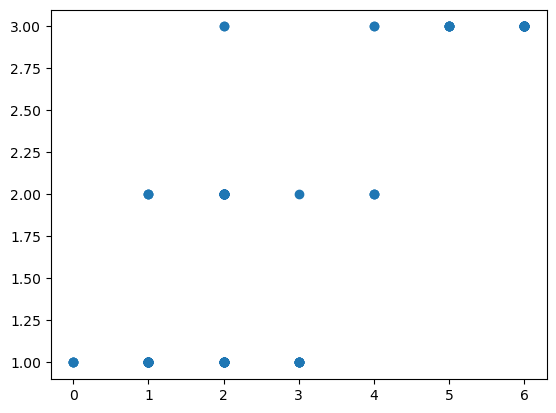

High: neigh_1, eyes - -0.596383392011357
Low: neigh_1, densest_quadrant - -0.2580101613476181
Very Strong: no_neigh_above, no_neigh_below - 0.9474725643184438


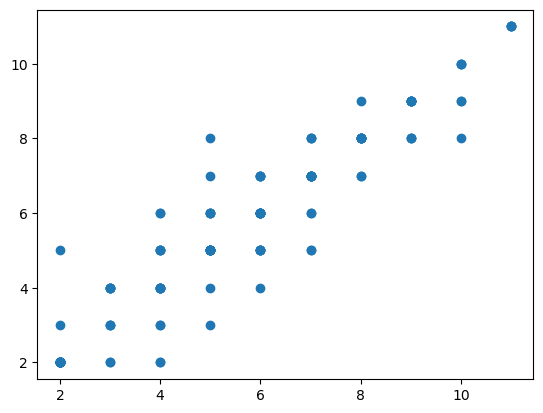

None: no_neigh_above, no_neigh_left - 0.049450723242195044
None: no_neigh_above, no_neigh_right - 0.05076384504260373
Low: no_neigh_above, no_neigh_horiz - 0.19683048044748197
Very Strong: no_neigh_above, no_neigh_vert - 0.8614948158782879


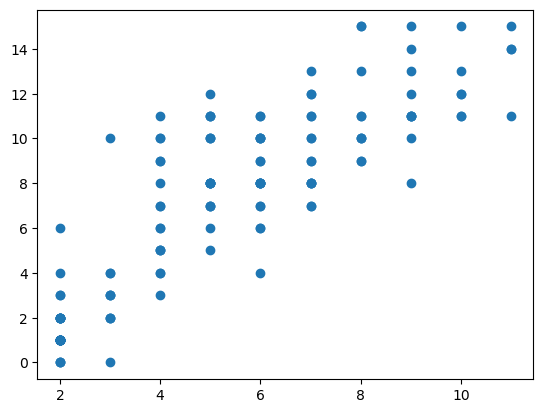

Low: no_neigh_above, connected_areas - 0.27206659962659663
None: no_neigh_above, eyes - 0.031999091229363966
Low: no_neigh_above, densest_quadrant - -0.10995853411747164
None: no_neigh_below, no_neigh_left - 0.016535222120595106
None: no_neigh_below, no_neigh_right - 0.05619111245680675
Low: no_neigh_below, no_neigh_horiz - 0.20029524859181203
Very Strong: no_neigh_below, no_neigh_vert - 0.8783471882023928


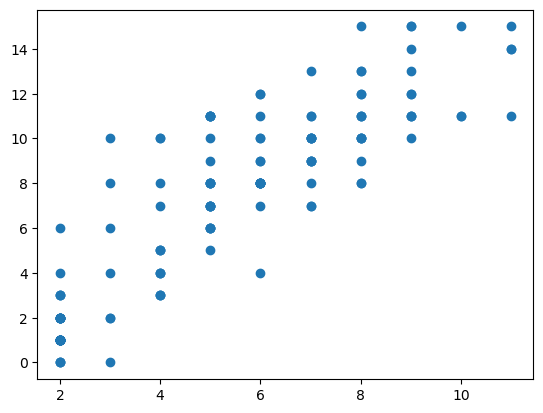

Low: no_neigh_below, connected_areas - 0.263789758873926
None: no_neigh_below, eyes - 0.09224875926253183
Low: no_neigh_below, densest_quadrant - -0.13059904997511532
Very Strong: no_neigh_left, no_neigh_right - 0.9044427785017863


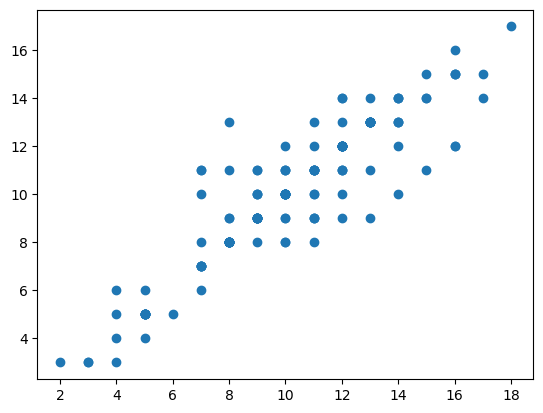

Very Strong: no_neigh_left, no_neigh_horiz - 0.795876938995788


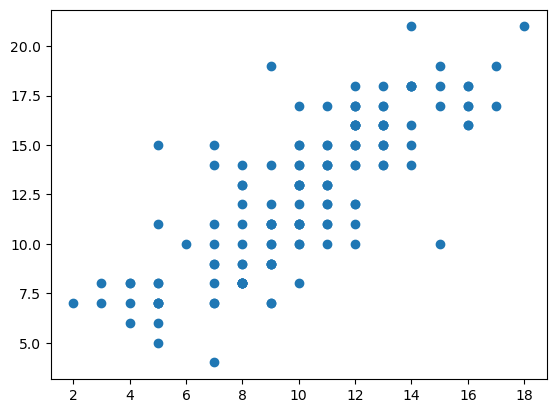

None: no_neigh_left, no_neigh_vert - -0.06522538165585781
Low: no_neigh_left, connected_areas - 0.24934845552569365
None: no_neigh_left, eyes - -0.038214885601042956
Low: no_neigh_left, densest_quadrant - -0.14002319561090376
Very Strong: no_neigh_right, no_neigh_horiz - 0.8128019485054567


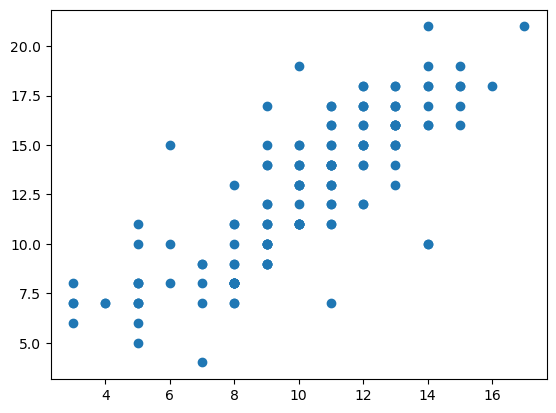

None: no_neigh_right, no_neigh_vert - -0.043554021549045585
Medium: no_neigh_right, connected_areas - 0.324516475629684
None: no_neigh_right, eyes - -0.017310416001798754
Low: no_neigh_right, densest_quadrant - -0.1060732829391025
Low: no_neigh_horiz, no_neigh_vert - 0.2576410583503702
Low: no_neigh_horiz, connected_areas - 0.14740840613265638
Low: no_neigh_horiz, eyes - 0.1853987334968302
Low: no_neigh_horiz, densest_quadrant - -0.1475692726247372
None: no_neigh_vert, connected_areas - 0.01191823200505801
Medium: no_neigh_vert, eyes - 0.3353347416192864
None: no_neigh_vert, densest_quadrant - -0.013174325617253319
High: connected_areas, eyes - -0.620400697268809
Low: connected_areas, densest_quadrant - -0.16211217797374328
Low: eyes, densest_quadrant - 0.19602372460866768


In [69]:
#section 3.4
for x in range(16):
    for y in range(16-x):
        if (x + 2 != y + x + 2):
            correlation, _ = sp.pearsonr(df.iloc[:,x + 2], df.iloc[:, y + x + 2])
            string = df.iloc[:, x + 2].name + ", " + df.iloc[:, y + x + 2].name
            if (abs(correlation) < 0.1):
                string += " - " + str(correlation)
                print("None: " + string)
            elif (abs(correlation) >= 0.1 and abs(correlation) < 0.3):
                string += " - " + str(correlation)
                print("Low: " + string)
            elif (abs(correlation) >= 0.3 and abs(correlation) < 0.5):
                string += " - " + str(correlation)
                print("Medium: " + string)
            elif (abs(correlation) >= 0.5 and abs(correlation) < 0.7):
                string += " - " + str(correlation)
                print("High: " + string)
            elif (abs(correlation) >= 0.7):
                string += " - " + str(correlation)
                print("Very Strong: " + string)
                plt.scatter(df.iloc[:,x + 2], df.iloc[:, y + x + 2])
                plt.show()
                plt.clf()